## Centralized CIFAR10 Results

In [3]:
import json
import numpy as np

seeds = [0,1,2]
depth = 56
small_blocks = 12
dataset = 'CIFAR100'

normal_base_paths = [f'saved_models/{dataset}/CentralizedResNet{depth}_{i}/' for i in seeds]
adaptable_base_paths = [f'saved_models/{dataset}/CentralizedAccordionResNet{depth}_{i}/' for i in seeds]
distill_base_paths = [f'saved_models/{dataset}/CentralizedDistillAccordionResNet{depth}_{i}/' for i in seeds]
small_base_paths = [f'saved_models/{dataset}/CentralizedSmallResNet{depth}_{small_blocks}_{i}/' for i in seeds]

normal_accuracies = []
adaptable_accuracies = []
distill_accuracies = []
small_accuracies = []

with open(normal_base_paths[0] + 'results.json', 'r') as f:
    results_normal = json.load(f)
    model_fractions = results_normal['model_fractions']

for i in seeds:
    with open(normal_base_paths[i] + 'results.json', 'r') as f:
        results_normal = json.load(f)
        normal_accuracies.append(results_normal['accuracies'])

    with open(adaptable_base_paths[i] + 'results.json', 'r') as f:
        results_adaptable = json.load(f)
        adaptable_accuracies.append(results_adaptable['accuracies'])

    with open(distill_base_paths[i] + 'results.json', 'r') as f:
        results_distill = json.load(f)
        distill_accuracies.append(results_distill['accuracies'])

    with open(small_base_paths[i] + 'results.json', 'r') as f:
        results_small = json.load(f)
        small_accuracies.append(results_small['accuracies'])

adaptable_accuracies = np.array(adaptable_accuracies)
normal_accuracies = np.array(normal_accuracies)
distill_accuracies = np.array(distill_accuracies)
small_accuracies = np.array(small_accuracies)

adaptable_accuracy = np.mean(adaptable_accuracies, axis = 0)
normal_accuracy = np.mean(normal_accuracies, axis = 0)
distill_accuracy = np.mean(distill_accuracies, axis = 0)
small_accuracy = np.mean(small_accuracies, axis = 0)

adaptable_acc_std = np.std(adaptable_accuracies, axis = 0)
normal_acc_std = np.std(normal_accuracies, axis = 0)
distill_acc_std = np.std(distill_accuracies, axis = 0)


In [4]:
adaptable_acc_std, normal_acc_std, distill_acc_std

(array([0.29397657, 1.8766341 , 2.00984245, 1.15534507, 0.89358205,
        0.50466711, 0.41201402, 0.49263464, 0.60356349, 0.6750967 ,
        0.70884883, 0.85826699, 0.77176565, 1.09703641, 0.92631888,
        1.04595517, 0.9184891 , 0.94435163, 0.89744081, 0.86096845,
        1.07161353, 0.50075499, 0.35649529, 0.41354833, 0.3227314 ,
        0.35026974, 0.37142369, 0.38767111]),
 array([0.22881336, 0.26386023, 0.18372685, 0.26549744, 0.31094837,
        0.55323292, 0.54658536, 0.58636356, 0.48833049, 0.31457202,
        0.38724095, 0.39969433, 0.46267339, 0.58189346, 0.58948188,
        0.68975036, 0.52917126, 0.65270378, 0.6203225 , 0.5215575 ,
        0.65792603, 0.4102032 , 1.63571255, 2.16282223, 2.1637827 ,
        1.8659582 , 0.65341836, 0.84581322]),
 array([0.32427697, 1.36362263, 1.1558835 , 1.01627861, 0.89033077,
        0.98455856, 1.25698935, 0.97755932, 0.78574805, 0.81661905,
        1.74959043, 1.71749818, 2.49233937, 2.09141632, 2.17458553,
        2.78640748, 2.73

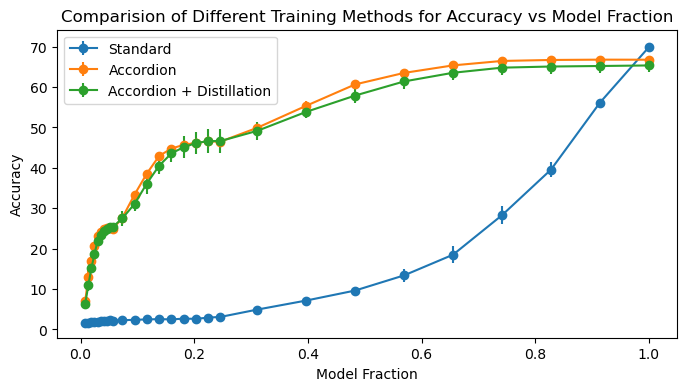

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.errorbar(model_fractions, normal_accuracy, normal_acc_std, linestyle = '-', marker = 'o', label = 'Standard')
plt.errorbar(model_fractions, adaptable_accuracy, adaptable_acc_std, linestyle =  '-',  marker = 'o', label = 'Accordion')
plt.errorbar(model_fractions, distill_accuracy, distill_acc_std, linestyle = '-',  marker = 'o', label = 'Accordion + Distillation')
plt.ylabel('Accuracy')
plt.xlabel('Model Fraction')
plt.title("Comparision of Different Training Methods for Accuracy vs Model Fraction")

plt.legend()

In [4]:
normal_accuracy, adaptable_accuracy, model_fractions

(array([ 1.64333333,  1.67666667,  1.71666667,  1.76666667,  1.77333333,
         2.05      ,  2.09333333,  2.14333333,  2.25      ,  2.11333333,
         2.27666667,  2.38666667,  2.48      ,  2.55      ,  2.48333333,
         2.67333333,  2.62333333,  2.92666667,  3.1       ,  4.91333333,
         7.15      ,  9.63      , 13.38333333, 18.5       , 28.27666667,
        39.55      , 56.12666667, 69.88      ]),
 array([ 6.98666667, 12.87333333, 16.83      , 20.57333333, 23.06333333,
        24.05666667, 24.75666667, 25.04333333, 25.13666667, 24.97333333,
        27.61      , 33.38333333, 38.57666667, 42.93666667, 44.78      ,
        45.68666667, 46.18666667, 46.54      , 46.49      , 49.92      ,
        55.36333333, 60.65333333, 63.50333333, 65.36333333, 66.46333333,
        66.70333333, 66.78333333, 66.76666667]),
 [0.008108347266401823,
  0.013548065593315853,
  0.018987783920229883,
  0.024427502247143917,
  0.029867220574057947,
  0.035306938900971974,
  0.04074665722788601,
  0.0

In [16]:
import exp_utils

normal_val_accuracies = np.array(exp_utils.get_val_accuracies(normal_base_paths, seeds))
adaptable_val_accuracies = np.array(exp_utils.get_val_accuracies(adaptable_base_paths, seeds))
distill_val_accuracies = np.array(exp_utils.get_val_accuracies(distill_base_paths, seeds))
small_val_accuracies = np.array(exp_utils.get_val_accuracies(small_base_paths, seeds))

adaptable_val_accuracy = np.mean(adaptable_val_accuracies, axis = 0)
normal_val_accuracy = np.mean(normal_val_accuracies, axis = 0)
distill_val_accuracy = np.mean(distill_val_accuracies, axis = 0)
small_val_accuracy =  np.mean(small_val_accuracies, axis = 0)


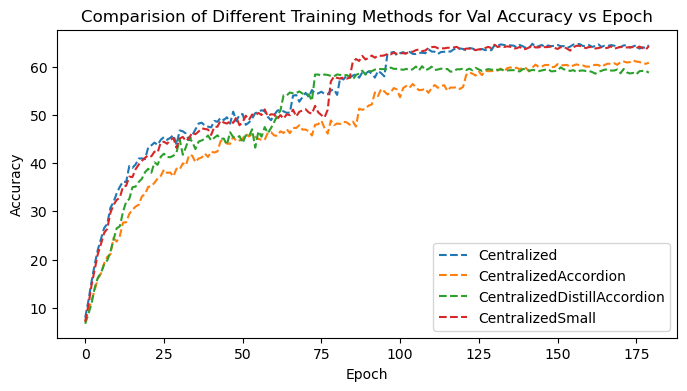

In [17]:
tab = np.arange(len(adaptable_val_accuracy))

plt.figure(figsize=(8,4))
plt.plot(tab, normal_val_accuracy, linestyle = '--', label = 'Centralized')
plt.plot(tab, adaptable_val_accuracy, linestyle =  '--',  label = 'CentralizedAccordion')
plt.plot(tab, distill_val_accuracy, linestyle = '--',  label = 'CentralizedDistillAccordion')
plt.plot(np.arange(len(small_val_accuracy)), small_val_accuracy, linestyle = '--',  label = 'CentralizedSmall')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Comparision of Different Training Methods for Val Accuracy vs Epoch")

plt.legend()

In [18]:
distill_accuracy[-1]

65.35000000000001